# Vader

In [1]:
# Uncomment and run this cell if the relative imports are not working
import sys
sys.path.append('..')

In [2]:
%matplotlib inline

from utils.db_client import DBClient
from utils.vader import VADER_Analyzer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
topics = ['civil_rights', 'courts', 'criminal_justice', 'drugs', 
          'econ_inequality', 'econ_jobs', 'education', 'environment', 
          'foreign_policy', 'governance', 'guns', 'health', 'immigration', 
          'puerto_rico', 'rural', 'russia', 'shutdown', 'social_security', 
          'taxes', 'technology', 'women_rights']


In [4]:
def run_vader(topic):
    v = VADER_Analyzer(topic)
    v.get_data()
    v.run_vader()
    v.outcome_by_group()
    v.results_for_plotting()
    v.plot()
    return v

In [5]:
def print_samples(vader_analyzer, group):
    for index, value in vader_analyzer.df[vader_analyzer.df.group == group].sample(10)["tweet_text_raw"].iteritems():
        print(f"{index}: ", value)

In [6]:
def print_samples_all_groups(vader_analyzer):
    groups = ['dem-base', 'rep-base', 'dem-lead', 'rep-lead']
    for group in groups:
        print(group)
        print("")
        print_samples(vader_analyzer, group)
        print("")

## Vader by Topic

### Civil Rights

I'm trying
Connected to political tweets DB


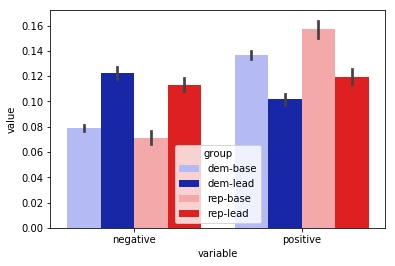

In [9]:
cr = run_vader("civil_rights")

In [10]:
print_samples_all_groups(cr)

dem-base

6128:  Don't be fooled—Trump's new
"conscience and religious freedom division of the office for civil rights at the Department of Health and Human Services" is about discriminating against the #LGBTQ community and taking rights away from women.
https://t.co/QBRTz3np4t
5237:  Republicans are partying right after they voted to end health care coverage for millions of working people. https://t.co/1kMOgDRtZ3
5301:  We lost an all time hero today. A fearless leader in civil rights, on the environment, and always for El Paso. https://t.co/lxNT818liJ
210:  We need #SCOTUS to protect 

Labor Rights 
Voting Rights
Women’s Reproductive Rights
And to remind @POTUS

NO ONE is above the Law. https://t.co/Ldppx6bNDQ
7462:  Every American should have the freedom to love who they love without being treated differently. I’m proud to be a part the #NoH8 campaign. On this #DayOfSilence we stand up for justice &amp; equality. Join in my commitment to the LGBTQ community &amp; equal rights for al

### Courts

I'm trying
Connected to political tweets DB


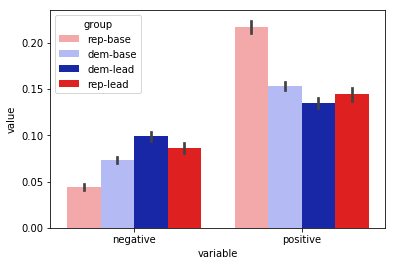

In [11]:
courts = run_vader("courts")

In [12]:
print_samples_all_groups(courts)

dem-base

6889:  Too often, individuals with disabilities are pushed to the margins of their communities or struggling to get by.

The Supreme Court's powerful Olmstead decision—reached 19 years ago today—ensures Americans with disabilities receive care in the most integrated setting possible.
2397:  It took immense courage for Dr. Ford to come forward with her story, all the while knowing exactly how Republicans in Congress and Trump would treat her. Sadly, her fears—and the fears that so many other women experience—materialized.
732:  Republicans want Brett Kavanaugh on the Supreme Court when their lawsuit to end coverage for pre-existing conditions comes before #SCOTUS.
 
#WhatsAtStake? The coverage that helps Marnie’s daughter thrive while growing up with Down Syndrome. Watch⬇️ https://t.co/gxGg3V3H3h
3610:  Thank you, @SenAmyKlobuchar, for your strong leadership in last week's hearing for Supreme Court nominee, Brett Kavanaugh. Your poise, dignity, and determination was powerful, 

### Criminal Justice

I'm trying
Connected to political tweets DB


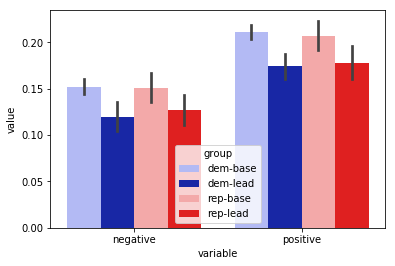

In [13]:
cj = run_vader("criminal_justice")

In [14]:
print_samples_all_groups(cj)

dem-base

571:  @RepJasonLewis #SAFEJusticeAct implements successful reforms from states &amp; restores accountability, fairness, &amp; rationality to the criminal justice system
101:  Flaccavento, local leaders talk about criminal justice reform https://t.co/jDBPqbUY6I
667:  This week's #SundayIssue: Reforming Criminal Justice. https://t.co/d6HbKWHJ70
523:  I just finished mtg with #thelinksinc and we had a great discussion about voting rights, criminal justice reform &amp; health disparities. https://t.co/EYApW2Xgi8
574:  Honored to serve on a panel on Behavioral Health and the Front End of the Criminal Justice System @CSGJC #50StatePublicSafety Summit. Important work, look forward to continuing the work in Arkansas. https://t.co/SsRGWkWjh8
42:  Hard pass. Working with and validating the Koch brothers on immigration and criminal justice reform while they are supporting some of the most heinous politicians and policies is not a win for America. https://t.co/ion1k0IX42
428:  We're lead

### Drugs

I'm trying
Connected to political tweets DB


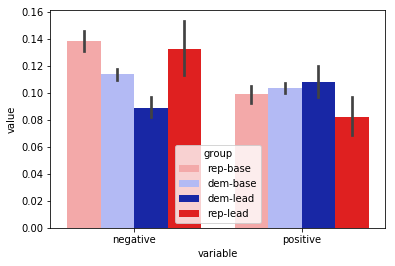

In [15]:
drugs = run_vader("drugs")

In [16]:
print_samples_all_groups(drugs)

dem-base

991:  More than 900,000 lbs. of prescription drugs have been taken off our streets this year thanks to programs like National Take Back Day. Do your part on October 27, visit https://t.co/qZM5b1pyzK for more info and to find take back locations near you. #DEATakeBack
1960:  Toured the future home of the Bristol Lifestyle Recovery Center this AM. It will offer critical resources to fight the opioid epidemic. https://t.co/2Ce4mpsxrz
576:  Here is my answer on healthcare.

Universal affordable and accessible healthcare for everyone.

We can accomplish this by:

1. Giving everyone the choice to opt into Medicare. 
2. Give Medicare the power to negotiate drug prices with big pharma. https://t.co/dEJ7d4LdNA
2387:  Today is an opportunity to get educated on this issue &amp; dispose of prescription drugs in a safe and responsible way. https://t.co/y5OppfuhEK
3278:  Healthcare, prescrip drugs price gouging, education, common sense gun reforms, jobs, infrastructure, SS, fair &amp; equi

### Economic Inequality

I'm trying
Connected to political tweets DB


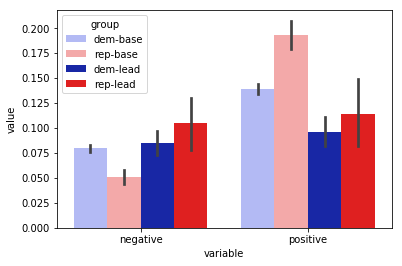

In [17]:
ei = run_vader("econ_inequality")

In [18]:
print_samples_all_groups(ei)

dem-base

2146:  It’s been 55 years since the Equal Pay Act became law, yet women across Montana know there’s more to do to make equal pay a reality. Women deserve equal pay for equal work, and that’s why I’ll keep fighting to pass the Paycheck Fairness Act. #mtpol #mtsen https://t.co/ALkn1LyhI1
2164:  #NetNeutrality means consumers — not big corporations— choose what websites and applications we see online. Today, the @FCC’s repeal of #NetNeutrality goes into effect, but the fight for a free and open internet continues in the House. #SaveTheInternet.
114:  If we want to help people then we need to reverse the tax cuts for the big corporations, and permanently cut taxes for working people. The Brownback/Estes Tax Plan will destroy our national economy, just like it destroyed the Kansas economy. 
#ksleg #ks04

https://t.co/9KQnJwxk4v
1135:  U.S. #JobsReport shows 287,000 new jobs. Let’s continue this progress, expanding economic opportunity for all. https://t.co/TAzrXEDrFs
2074:  The ho

### Economy/Jobs

I'm trying
Connected to political tweets DB


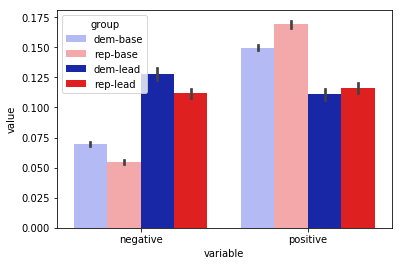

In [19]:
ej = run_vader("econ_jobs")

In [20]:
print_samples_all_groups(ej)

dem-base

10413:  Will vote no on #CRomnibus as drafted. Special interest giveaways, weakening wall street regs &amp; empowering rich donors a no go with me.
2791:  TEAM MCMURRAY: fundraises at picnics, has been visiting every inch of NY27 since it was freezing outside, is fighting for working Americans

TEAM COLLINS: Backed him, praised him, took selfies with him, raised cash for him, still won’t throw him out, think they own your vote
16467:  Proud to stand up for working Americans &amp; fight against rolling back long-standing labor laws. https://t.co/rcJyEaCRih
4196:  As a woman in manufacturing, I know that if we want to lead and win the future, we need policymakers who understand the value of human work.

I'm running to be the champion for Michigan's middle class. I'd be honored to have your vote.

Join us: https://t.co/oJlHk5vmkq https://t.co/t9wa5TIJ3T
13545:  Proud to push for real improvements to the #ACA to make it work for American families #ProtectOurCare https://t.co/sgKF

### Education

I'm trying
Connected to political tweets DB


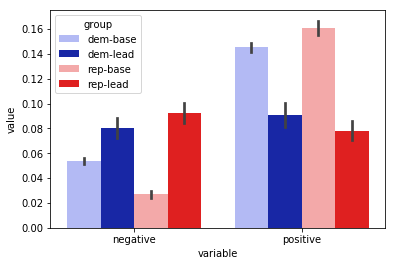

In [21]:
edu = run_vader("education")

In [22]:
print_samples_all_groups(edu)

dem-base

99:  An entire generation is struggling with the weight of student loan debt—making it much harder for them to start businesses, buy homes, &amp; contribute to their families &amp; communities.

That doesn't just hurt them—it hurts our economy. We must do better.

https://t.co/pqoj8m5Wx1
2802:  The burden of student loans shackles the futures of America’s brightest. Let’s pass #BankOnStudents &amp; allow young people to refinance loans.
1692:  UHPA Pres: "deep understanding of higher education issues" http://t.co/vCORb5Ym #HiSen
1149:  The growing cost of higher ed is hurting students across #MN01. I heard that message loud and clear from @gustavus students yesterday. As a millennial w/ student loan debt, this is personal. Congress must work to ensure post-secondary education is affordable for everyone. https://t.co/OOEtDydrTY
2314:  So pleased to welcome students from Pekin High School in Tazewell County to the U.S. Capitol today! http://t.co/KVdM72u44D
1911:  Welcoming high

### Environment

I'm trying
Connected to political tweets DB


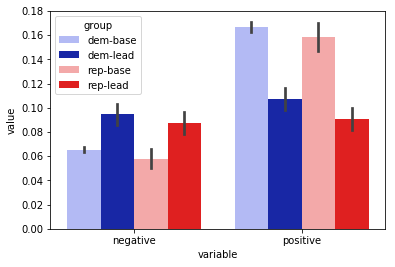

In [23]:
env = run_vader("environment")

In [24]:
print_samples_all_groups(env)

dem-base

3413:  ICYMI: I spoke w/ @mainecalling about Syria, Climate Change, @PPMEAF, &amp; more. Check out my interview: https://t.co/71l0bfcLRX #mepolitics
661:  Our precious resources and public lands should not be sacrificed for corporate profits.
I will protect Arizona's natural resources and work for sensible management of our #PublicLands. 
From @CenterForBioDiv: https://t.co/aHuLFWRVM5

#Brill4PublicLands #Vote4Brill https://t.co/QtuWJU7M74
5743:  Long Islanders will fight to protect our environment, even when @EPAScottPruitt won't! https://t.co/TLKzJPPFNg
3877:  #Zinke’s recommendations could jeopardize boundaries of public lands. We must stand against this proposal.
https://t.co/qDeHrNSLA8
5340:  I’m honored to announce that Solana Beach City Councilmember Peter Zahn is the latest local elected official to endorse our campaign!

As founder of the United States Green Chamber of Commerce, Peter has played an important role in clean energy advocacy.  https://t.co/f0wYjabWxc
111

### Foreign Policy

I'm trying
Connected to political tweets DB


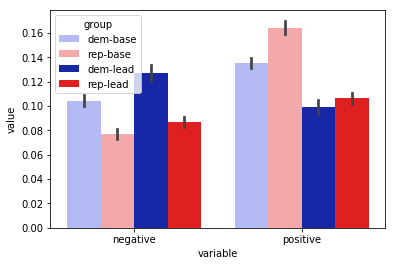

In [27]:
fp = run_vader("foreign_policy")

In [28]:
print_samples_all_groups(fp)

dem-base

4397:  This is reprehensible, dangerous and puts millions of lives at risk. When will @RepGrothman &amp; #GOP electeds finally put national security over party &amp; say enough is enough? https://t.co/ZFs3oFXWRi
3755:  @RepAnthonyBrown @Call_Me_Dutch @FBI While GOP rescinded funds for project, a fully consolidated @FBI HQ is a matter of national security–thanks @Call_Me_Dutch for your support.
4259:  .@realDonaldTrump's lawyer is now describing Michael Flynn, Trump's Former National Security Advisor, as "an Obama Administration Official."

They know they're in trouble.
https://t.co/BPvptq0PTO
4257:  Michael Flynn, a former senior Trump White House official—who was responsible for matters of NATIONAL SECURITY—has pleaded guilty to a felony while in office. 

It's essential that this investigation continue. We must protect our democracy.
1831:  The veracity of #ClimateChange should no longer be up for debate.  Our national security, our economic prosperity, and millions of live

### Governance

I'm trying
Connected to political tweets DB


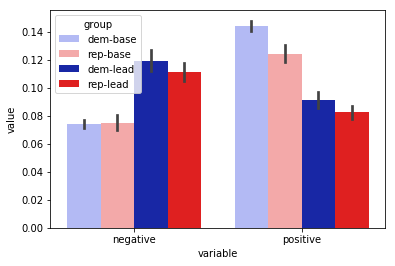

In [29]:
gov = run_vader("governance")

In [30]:
print_samples_all_groups(gov)

dem-base

4048:  I'm proud to be endorsed by @StopBigMoney. In Congress, I'll fight to get dark money out of politics &amp; return power to the people. #FL07
4396:  Big money Koch network bought the Republican party, some judges, and brainwashed many of their voters. See how it's a threat to democracy: https://t.co/0UubsKGnwK
4265:  Trump's EO on voter fraud is just the latest voter suppression tactic from his administration - read my statement
https://t.co/yPBN6jS2Zc
1087:  In my ER, I see this all too often. Driven by greed, Big Pharma makes lifesaving medications too expensive. Insurance companies barely cover medical costs. Then they pay off politicians with donations and dark money so Congress puts their interests first. https://t.co/qUBjHt5fAw
6802:  May 7 is the deadline to register to vote in the June 5th Democratic Primary. Working together, we can make sure working Mississippians are put ahead of special interests. https://t.co/mBDn2IhUTH
1250:  Thank you for being here &amp;

### Guns

I'm trying
Connected to political tweets DB


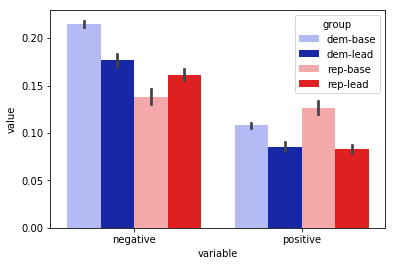

In [31]:
guns = run_vader("guns")

In [32]:
print_samples_all_groups(guns)

dem-base

1033:  There are common sense solutions to curbing gun violence. But instead of advocating for reforms that would save lives, @LeahVukmir is following the lead of her NRA donors. Shameful. #wisen #wbadebate https://t.co/D1C2bdCdSG
3881:  94% of Americans (93% of gun owners) want background checks on every gun sale. Retweet if you do too.
4472:  1. Universal background checks on EVERY GUN TRANSFER
2. Ensure that every gun owner with minors in the home has guns secured from children with trigger locks at a minimum

#ProLife #gunsense #guns #GunControlNow
5791:  I wear this "F" grade as a badge of honor. I'm proud to stand up for gun safety &amp; against the NRA's dangerous agenda. #EnoughIsEnough https://t.co/pH8k6xXxc3
5942:  @Donald_Booker We stand with the vast majority of Americans and gun owners in our support of a ban on assault weapons and common-sense background checks - along with a focus on strengthening families, education, healthcare, and communities so that all Ame

### Health

I'm trying
Connected to political tweets DB


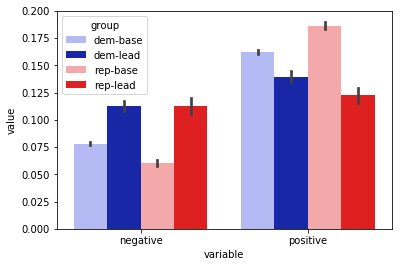

In [33]:
health = run_vader("health")

In [34]:
print_samples_all_groups(health)

dem-base

4175:  I appreciate the opportunity to talk about my priorities for our district in The Bulletin. It's time for leaders in Congress to provide better access to affordable health care, build strong partnerships for good-paying jobs, and invest in our education. https://t.co/q4CL3KtU4l
14598:  #GrahamCassidy means being a woman is once again a "pre-existing condition" - we won't stand for this! Women deserve better than #Trumpcare https://t.co/H3MvCPvDOX
1568:  Access to health care, community-based services, and strong Medicaid and Medicare programs are how to support the one in four American adults with a disability as reported by the CDC: https://t.co/6MMJH6HxGz
1115:  A packed house in Putnam Co on stop #2 of #TakeBackWVTour.

Health care. Opioids. Social security. Veterans. Jobs. Clean water. Coal. All topics that came up.

One thing is clear: people have had enough of Washington politicians. Time to put people first! #LetsGo #WV02 #wvpol https://t.co/SUTYEjHf2B
11309:  Th

### Immigration

I'm trying
Connected to political tweets DB


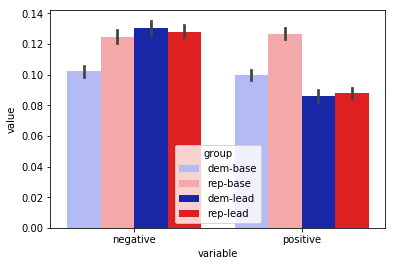

In [35]:
imm = run_vader("immigration")

In [36]:
print_samples_all_groups(imm)

dem-base

9352:  @VP @realDonaldTrump Contrary to @VP Pence’s rhetoric today, eliminating environmental safeguards &amp; implementing bigoted, discriminatory immigration policies makes America weaker, not greater.
12088:  Make plans now to join us for Mothers March at 4p today. We will not stop until every child separated is reunited w their Mother/Family.  #FamilesBelongTogether #NoBabyJails #familiesincarceration https://t.co/pugbLWVXR7
10798:  I've called on the Trump Administration to immediately end its inhumane policy of separating children from their parents at the border. This policy has traumatized children who are fleeing extreme violence. #FamiliesBelongTogether
5751:  Hosted an immigration reform roundtable discussion in Beaverton. U.S. House needs to act on comprehensive bill soon. http://t.co/YOxTIhLpRg
10481:  Separating families doesn't act as a deterrent, it's devastating for children and it cuts at the moral heart of who we are as a country. The Trump administration c

### Puerto Rico

I'm trying
Connected to political tweets DB


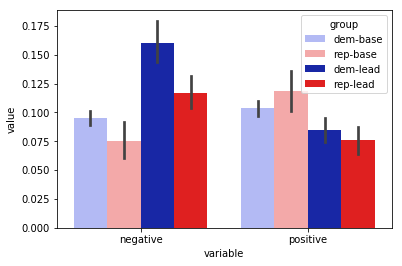

In [41]:
pr = run_vader("puerto_rico")

In [42]:
print_samples_all_groups(pr)

dem-base

290:  #tbt to when the White House tried to stop me and other lawmakers from going to Puerto Rico to assess Hurricane damage for ourselves (we didn't believe the administration's rosy picture).  I figured out how to go anyway &amp; got these pics. That's how you #StandWithPuertoRico https://t.co/DJMfJrOJbJ
1518:  A new estimate puts Hurricane Maria's death toll at more than 4,000 Americans, and counting, as #PuertoRico's hospitals still struggle to rebuild. Unacceptable. They need ongoing aid. I call on my colleagues and @POTUS to join me in committing to more. https://t.co/zPQCuWi78T
672:  Keeping the people of Puerto Rico, US Virgin Islands and all in the path of #Hurricane #Irma in my prayers. https://t.co/phKYbD2wfn
1165:  This short-term sham ignores important priorities for New Jersey like funding for the opioid crisis and community health centers, deserts hardworking American Dreamers, hurts our military readiness, and abandons disaster-stricken communities in Puerto R

### Rural

I'm trying
Connected to political tweets DB


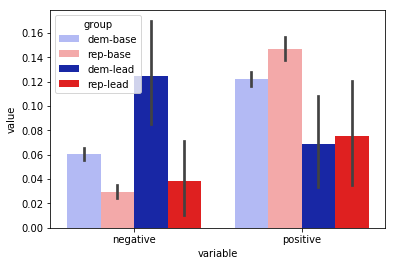

In [45]:
rural = run_vader("rural")

In [46]:
print_samples_all_groups(rural)

dem-base

1002:  I had a great afternoon listening to the @ILFarmBureau and Whiteside County farmers about what needs to be in the new Farm Bill. https://t.co/BI5CG1X8Ga
931:  Internet is a necessity yet big cable still ignoring rural communities. State/Feds need to hold them accountable: https://t.co/lhWfI2sR19
256:  WATCH: Joe has been listening to Hoosier anti-hunger groups about what can be done to eliminate hunger in Indiana. Here are some of the ways Joe successfully pushed to end food insecurity in the 2018 Senate-passed Farm Bill. #HungerActionMonth https://t.co/xhlrfZAxR7
27:  Joe successfully included in the Senate-passed Farm Bill a provision that would increase export opportunities for Hoosier farmers. https://t.co/Ptxg2BgLtI
736:  King amendment is reason enough to vote no on the Farm Bill. Unconscionable interference in state protections. http://t.co/ltKrPW3deS
379:  Thanks to the #Hubbardston Council on Aging for organizing last night’s candidates forum - a great opportu

### Russia

I'm trying
Connected to political tweets DB


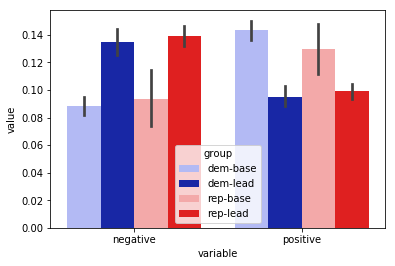

In [47]:
russia = run_vader("russia")

In [48]:
print_samples_all_groups(russia)

dem-base

726:  Protecting the Mueller investigation has bipartisan support, yet Republican leadership will not work with us to get this passed. We must preserve the integrity of this investigation. It’s not about politics - it’s about the future of our democracy. https://t.co/Nws9XqTodf
1091:  @TruNewsNet @POTUS Feel free to call me names because I'm cool like that. But in less than a year, Special Counsel Mueller has two guilty pleas, two agreements to cooperate, and two indictments. #FactsMatter
462:  Rod #Rosenstein shouldn’t be fired or forced to resign for doing his job. Who would be next: #Mueller? That’s why Congress needs to pass the Special Counsel Independence and Integrity Act, but the House majority won’t bring it up for a vote. https://t.co/Fh2NouhRkN
1122:  This is why I am so committed to upholding the independence of the Special Counsel, the integrity of the Justice Department, and the law: Trump Ordered Mueller Fired, but Backed Off When White House Counsel Threatened

### Shutdown

I'm trying
Connected to political tweets DB


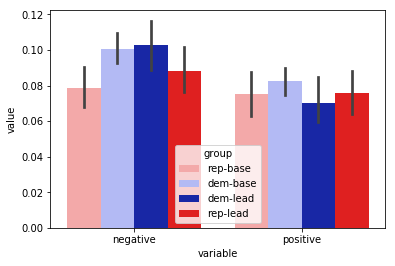

In [51]:
sd = run_vader("shutdown")

In [52]:
print_samples_all_groups(sd)

dem-base

952:  Trump just signed the budget bill ending the government shutdown.
487:  Obstructing House Votes To Defund Obamacare, Sets Up Government Shutdown http://t.co/JaX6SEqnkA via @HuffPostPol #uniteblue #cape2congress
17:  I look forward to joining @HARRISFAULKNER on @OutnumberedOT today at 1:30 pm ET/10:30 am PT to deliver an update on the #CaliforniaWildfires, particularly the #CarrFire and #RiverFire, and to discuss the President's tweets about forcing a government shutdown over his border wall.
294:  A reminder of what @realDonaldTrump
said on national TV last week:

"I am proud to shut down the government … I will take the mantle. I will be the one to shut it down."

#TrumpShutdown https://t.co/o1bYTRuZkX
7:  Pro tip on who’s responsible if government shuts down this fall:
  (a) Republicans control House
  (b) Republicans control Senate 
  (c) Republican President just told 
        you he wants to shut down the 
        government in the fall
362:  The U.S. Senate adjour

### Social Security

I'm trying
Connected to political tweets DB


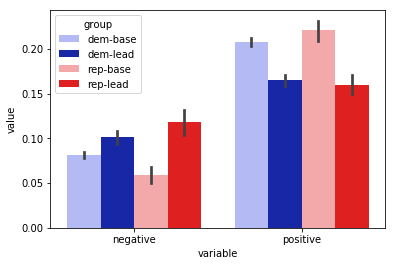

In [53]:
ss = run_vader("social_security")

In [54]:
print_samples_all_groups(ss)

dem-base

2326:  "Save Medicare, Medicaid and Social Security without cuts. Have to do it." 
–Donald Trump, June 16, 2015 https://t.co/pv9xKY8qJp
2123:  As your representative, I will work to ensure Social Security &amp; Medicare continue to be fully funded and will oppose reduction to benefits.
475:  @AARPMaine @JournalTribune @SenatorBrakey @SenAngusKing @AARPadvocates @RoamtheDomes Great question! Our plan is to meaningfully expand Social Security (stop taxation on SS income and end the pension offset) and Medicare (halve the cost of prescription drugs and eliminate the need for secondary private insurance).
6:  Proud to join with @SenSanders in putting forward a solution to reduce Social Security wait lines for individuals with disabilities and stop Social Security field office closures. Read more here ⬇️ https://t.co/8PVD5eeDil
2327:  After months of closure, Social Security office @ 3438 E Southcross has finally reopened.  Thx to Toni Moorhouse advocating for Southside.
2728:  Cu

### Taxes

I'm trying
Connected to political tweets DB


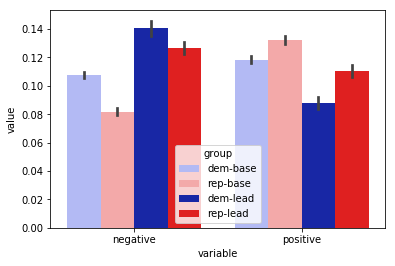

In [55]:
tax = run_vader("taxes")

In [56]:
print_samples_all_groups(tax)

dem-base

13442:  Ugly. Combatting this agenda of tax cuts for the top, program cuts for everyone else is why we run. Lives are at stake. 

https://t.co/dOolVFNn6x
633:  We won’t allow @realDonaldTrump to pay for the @GOP tax scam with Californians’ hard-earned money. Fighting to protect #CA taxpayers in the #CAleg Senate Education Committee this morning. #SCA23 #SB227 https://t.co/mmiLioyEFy
8403:  The #GOPTaxPlan that just passed out of the Senate Finance Committee had a new deduction for #BigOil—a $4 billion tax break for oil companies in the U.S. — &amp; other loopholes Republicans failed to close
7417:  Talking about how to stop the GOP’s tax break for the 1% in Racine today https://t.co/RKIi1r8Dds
7124:  HOGWASH! The OK political ruling class (who have God's unlisted phone #) say we can't raise taxes because state taxes at TOO HIGH.
6643:  I passed a bill thru the House to modernize the Small Biz Admin's Microloan program &amp; I'm fighting to cut taxes for small + new businesses

### Technology

I'm trying
Connected to political tweets DB


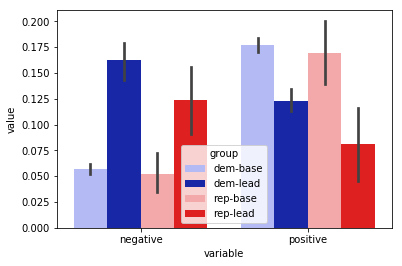

In [57]:
tech = run_vader("technology")

In [58]:
print_samples_all_groups(tech)

dem-base

737:  #NetNeutrality ends today. Hopefully other states follow Washington's example in creating their own net neutrality laws to protect a free and open internet for all consumers.
https://t.co/AjB1e8ErHf https://t.co/2O23Bj0DNT
165:  Today is the #NetNeutrality Day of Action! Without #NetNeutrality rules, ISPs can block, throttle, or create fast and slow lanes on internet access. We must act NOW to restore the free and open internet. https://t.co/HYo5bA6MkC
664:  We have 60 days to fight the end of net neutrality. It’s the basis of a free and open internet, and the foundation of a modern democracy. Congress should act swiftly to make it the law. Retweet if you agree.
https://t.co/nOr2njLlOy
604:  The fight for net neutrality is not over. We can overturn the FCC's disastrous decision but we need your help. https://t.co/jcCqHwrF82
837:  The motion to proceed to S.J.Res.52, net neutrality, was agreed to by a vote of 52-47. The final vote will take place around 3:00pm. That mean

### Women's Rights

I'm trying
Connected to political tweets DB


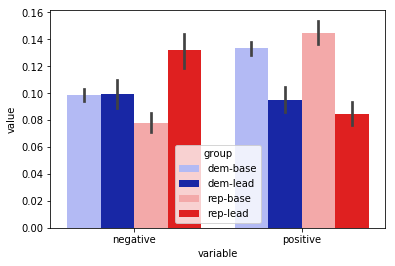

In [59]:
wr = run_vader("women_rights")

In [60]:
print_samples_all_groups(wr)

dem-base

2232:  I'm wearing red today to honor the commitments women have made to our workforce &amp; their contributions to society #DayWithoutWomen #IWD2017
3116:  It's #PinkOut Day! @RepErikPaulsen voted for the #AHCA, which would have cut funding for Planned Parenthood - a provider of critical health services for women. I stand with @ppmn today and EVERY day. #StandWithPP
511:  Today we celebrate Women’s Equality Day to mark the adoption of the 19th Amendment, which granted women the right to vote -- years after Montana’s Jeannette Rankin first held office. There’s still work to be done when it comes to equality, &amp; I’ll keep up the fight. #mtpol #mtsen
3315:  With pockets of the veteran population experiencing food insecurity at unusually high rates, we must commit to doing everything we can to ensure no veteran goes hungry or is homeless after putting their life on the line for our country.  https://t.co/aGh8OIKulj
2578:  A big thank you to the @NHCADSV and @603Amanda for the